# Pandas et l'analyse de données (tabulaires)

User guide : https://pandas.pydata.org/docs/user_guide/10min.html  
Cheat Sheet : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [3]:
# charger les bibliothèques requises
import pandas as pd


In [5]:
# Charger des données locales
df = pd.read_csv("data/css_openalex_26022026.csv")

In [ ]:
# Charger des données avec pandas depuis une URL
data_url = "https://raw.githubusercontent.com/pyshs/CUSO2026/refs/heads/main/data/css_openalex_26022026.csv"
df_url = pd.read_csv(data_url, compression="gzip")

### Hack Time

In [11]:
# Quel est le type de df ?


### DataFrames

Les DataFrames sont des listes (ou des séries lorsqu'on utilise pandas) qui sont assemblées dans un tableau.

![](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

##### Quelques outils utiles pour les dataframes :
- `.info()` des infos sur notre df  
- `.shape` sa "forme"  
- `.columns` les colonnes  
- `.dtypes` le type des données  
- `.head()` afficher les premières observations  
- `.tail()` afficher la fin du df  
- `.describe()` description basique  

### Hack Time

In [ ]:
# Testons tout ça ensemble !

# obtenir plus d'info sur notre df ?
# Quelle forme à notre df ?
# comment afficher les premières ou dernières lignes ?
# quelles sont les colonnes ?
# Quels sont leur type ?
# Quelles sont les grandes tendances de notre df ?

## Exploration de données - Variables

Maintenant que vous avez vos données, l'étape suivante est de vous familiariser avec elles. 

La plupart du temps, vous vous intéressez à certains concepts spécifiques. 
- Vous avez besoin d'un moyen de sélectionner uniquement les variables liées à vos concepts.


### Sélectionner des variables (colonnes)

- Nous pouvons utiliser des crochets sur un objet DataFrame pour sélectionner une seule colonne !
- Nous pouvons également utiliser une liste de chaînes contenant les noms de colonnes pour sélectionner plusieurs colonnes !

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)


In [12]:
# rappel : `columns` permet d'obtenir les noms des colonnes d'un DataFrame
df.columns

Index(['id', 'title', 'abstract_inverted_index', 'publication_year',
       'publication_date', 'open_access', 'relevance_score', 'abstract'],
      dtype='object')

In [ ]:
# Sélectionner la variable "title"
# …

In [ ]:
# Sélectionner plusieurs colonnes
my_vars = [
    "title",
    "publication_year",
    "relevance_score",
    "abstract",
]

df[my_vars]

In [ ]:
# Côté syntaxe l'idée c'est pareil que ça :
df[["title", "publication_year"]]

In [21]:
# Sauvegarder ce sous-ensemble plus petit de variables dans my_df
my_df = df[my_vars]
my_df.head()

,title,publication_year,relevance_score,abstract
0,Computational Social Science,2009.0,1357.36330,A field is emerging that leverages the capacit...
1,Manifesto of computational social science,2012.0,497.82666,NaN
2,Computational social science: Obstacles and op...,2020.0,438.54013,"Data sharing, research ethics, and incentives ..."
3,Computational Social Science and Sociology,2020.0,413.03424,The integration of social science with compute...
4,Integrating explanation and prediction in comp...,2021.0,408.06915,NaN


On peut aussi renommer nos colonnes (les passer en français, ou éviter d'avoir toujours à vérifier un codebook quand les noms des colonnes sont peu explicites).

In [22]:
# Renommer les colonnes
my_df.columns = ["titre", "annee", "score", "resume"]
my_df.head()

,titre,annee,score,resume
0,Computational Social Science,2009.0,1357.36330,A field is emerging that leverages the capacit...
1,Manifesto of computational social science,2012.0,497.82666,NaN
2,Computational social science: Obstacles and op...,2020.0,438.54013,"Data sharing, research ethics, and incentives ..."
3,Computational Social Science and Sociology,2020.0,413.03424,The integration of social science with compute...
4,Integrating explanation and prediction in comp...,2021.0,408.06915,NaN


In [71]:
# nb: meilleure pratique par rename, on voit la fonction plus tard dans le notebook

# my_df = my_df.rename(columns={
#     "title": "titre",
#     "publication_year": "annee",
#     "relevance_score": "score",
#     "abstract": "resume"
# })
# my_df.head()


### Calculer des trucs
### Méthodes utiles
Les Series et les DataFrames fournissent des méthodes très utiles pour explorer facilement les données. Voici quelques-unes des plus courantes :

- `mean()` : moyenne
- `median()` : médiane
- `std()` : écart-type
- `min()` : minimum
- `max()` : maximum
- `mode()` : mode (valeur la plus fréquente)
- `count()` : nombre d'observations
- `describe()` : statistiques descriptives
- `value_counts()` : fréquence des valeurs (tri à plat)

### Hack Time

In [ ]:
# Testons tout ça ensemble !


In [ ]:
# ex :
# Quel est le score moyen dans my_df ?
# quel % de publi par année ? etc.


### Visualisations avec Pandas

Vous pouvez utiliser pandas pour tracer vos résultats en utilisant la méthode `.plot()` sur un objet DataFrame ou Series.

Pour plus d'informations, cliquez [**ici**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

#### Aller plus loin

Il existe de nombreuses options pour jouer avec et améliorer une figure. 
Lorsque vous cherchez de l'aide pour changer quelque chose sur une figure, si vous avez la bonne terminologie, il est assez facile de trouver de l'aide !

#### Anatomie d'une figure
![Anatomie d'une figure](https://matplotlib.org/3.1.1/_images/anatomy.png)

In [ ]:
# Testons ensemble
# mega visu moche avec .plot()

## Filtrer, grouper, renommer

### .loc et iloc

Récupérer une ligne/un élément avec .loc et .iloc

In [ ]:
# TODO : un set_index() quelque part si pas fait jusque là ?

In [63]:
# .loc = nom des lignes et colonnes

In [64]:
# iloc = numéro index des lignes et colonnes

## Filtrer les observations (lignes)

## Filtrer les observations (lignes)

La plupart du temps, vous avez besoin de filtrer certaines observations (lignes) dans votre jeu de données.
- Vous vous intéressez à certains aspects particuliers de votre jeu de données (ex : seulement les articles, ceux publiés après une date, etc.).
- L'information est non pertinente et vous devez supprimer certaines données pour éviter de tirer de mauvaises conclusions (ex : les personnes qui refusent de répondre).

Vous avez donc besoin d'un moyen de filtrer les observations dans votre jeu de données.

- Les opérateurs relationnels permettent de sélectionner des observations.
- Il existe aussi des méthodes utiles pour vous aider dans cette tâche.

![](https://pandas.pydata.org/docs/_images/03_subset_rows.svg)


Je ne veux travailler que sur les articles

In [ ]:
df_article = df[df["TYPE"] == "article"]

In [ ]:
df_article["CITED_BY_COUNT"].mean()

25.70476032509537

Sélectionner uniquement les articles qui ont eu 0 citations

In [ ]:
filtre = (df["TYPE"] == "article") & (df["CITED_BY_COUNT"] == 0)
df[filtre]["TITLE"]

id
https://openalex.org/W2412274821            COMPUTATIONAL SOCIAL SCIENCE Submitted by
https://openalex.org/W4404923512    Computational reproducibility in computational...
https://openalex.org/W2252149878    Sociolinguistics for Computational Social Science
https://openalex.org/W3007246908    Review of Introduction to Computational Social...
https://openalex.org/W2956130469    Challenges and Opportunities for Computational...
                                                          ...                        
https://openalex.org/W4396704609    Effective communication skills: What engineers...
https://openalex.org/W4387451452    “This carpenter wende he were in despeir”: Mis...
https://openalex.org/W4376880434    Preview the Products on Display at Display Wee...
https://openalex.org/W4293698825    Special Report: Precision Psychiatry—Are We Ge...
https://openalex.org/W4390745070            Photovoltaics literature survey (no. 188)
Name: TITLE, Length: 2132, dtype: object

### Grouper

In [ ]:
tableau = (
    df.groupby("PUBLICATION_YEAR")["CITED_BY_COUNT"].agg(["median", "mean"]).tail(20)
)

In [ ]:
tableau

,median,mean
PUBLICATION_YEAR,,
2006,3.0,163.072581
2007,3.0,44.473333
2008,5.0,50.473373
2009,2.0,44.345946
2010,2.0,25.621622
2011,2.0,27.643293
2012,3.0,33.453020
2013,2.0,26.416216
2014,3.0,39.675879


<Axes: xlabel='PUBLICATION_YEAR'>

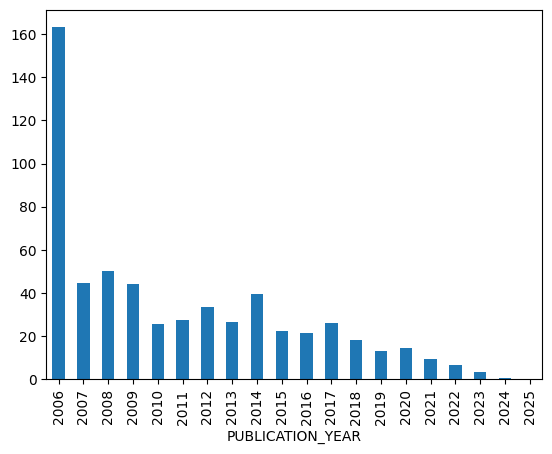

In [ ]:
tableau["mean"].plot(kind="bar")

<Axes: title={'center': 'Scatter plot des années de publications'}, xlabel='mean', ylabel='median'>

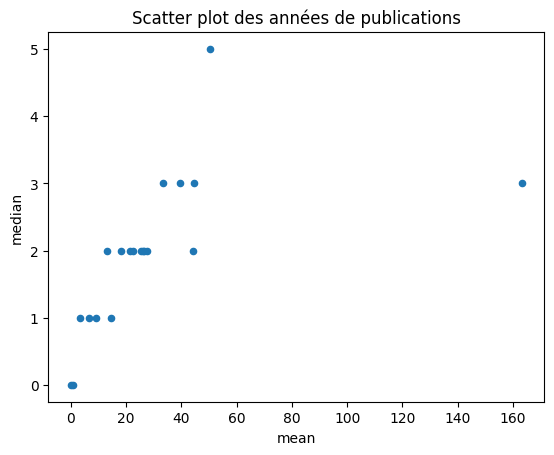

In [ ]:
tableau.plot(
    x="mean",
    y="median",
    kind="scatter",
    title="Scatter plot des années de publications",
)

## Manipuler plusieurs tableaux

In [ ]:
distribution_absolue = df["PUBLICATION_YEAR"].value_counts().sort_index().tail(20)
distribution_pourcentage = (
    round(100 * df["PUBLICATION_YEAR"].value_counts(normalize=True), 1)
    .sort_index()
    .tail(20)
)

Réunion deux tableaux ensemble

In [ ]:
pd.concat({"%": distribution_pourcentage, "F": distribution_absolue}, axis=1).tail(10)

,%,F
2016,5.0,462
2017,5.1,470
2018,5.7,526
2019,6.1,567
2020,7.4,689
2021,8.1,751
2022,6.7,626
2023,8.7,807
2024,7.6,707
2025,2.3,210


## Recoder

- remplacer
- valeurs nulles
- fonctions comme .cut
- solition générique de .apply

In [ ]:
df.isnull().sum()

DOI                              1716
TITLE                              11
DISPLAY_NAME                       11
RELEVANCE_SCORE                     0
PUBLICATION_YEAR                    0
                                 ... 
GRANTS.FUNDER                    8657
GRANTS.FUNDER_DISPLAY_NAME       8657
GRANTS.AWARD_ID                  8657
COUNTS_BY_YEAR.YEAR              3872
COUNTS_BY_YEAR.CITED_BY_COUNT    3872
Length: 182, dtype: int64

In [ ]:
# pd.qcut(df["CITED_BY_COUNT"], q=10, duplicates="drop").value_counts()

On veut recoder les publications en trois catégories :
- 0 ou 1 citations
- moins de 10 citations
- et plus de 10 citations

In [ ]:
df["CITED_INT"] = pd.cut(
    df["CITED_BY_COUNT"], [-1, 1, 10, 10000], labels=["<2", "2-10", "+10"]
)

In [ ]:
df.groupby("CITED_INT")["PUBLICATION_YEAR"].mean()

CITED_INT
<2      2017.494876
2-10    2015.906986
+10     2012.704863
Name: PUBLICATION_YEAR, dtype: float64

In [ ]:
# ICI CRÉER UN EXO AVEC CETTE IDÉE
# + STAT DESC
# + VISU ?

## Objectif

- tous les articles
- qui parlent vraiemnt de sciences sociales computationnelles
- taille de l'abstract

In [66]:
len("blabla")

6

In [68]:
df["abstract"]

0       A field is emerging that leverages the capacit...
1                                                     NaN
2       Data sharing, research ethics, and incentives ...
3       The integration of social science with compute...
4                                                     NaN
                              ...                        
2119    The following news item is taken in part from ...
2120    Author: Khan Tahsin AbrarAffiliation: Independ...
2121    Citation (2020), "Index", Härtel, C.E.J., Zerb...
2122    Publishing academic books in emerging fields p...
2123    Citation (2023), "Index", Lytras, M.D., Housaw...
Name: abstract, Length: 2124, dtype: object

In [ ]:
def compter(texte):
    if pd.isnull(texte):
        return 0
    else:
        return len(texte)


# Créer une nouvelle variable pour la taille de l'abstract
# Utilisez .apply

In [ ]:
df["LEN_ABSTRACT"].describe()

count     9278.000000
mean      2161.624811
std       5606.592746
min          0.000000
25%          0.000000
50%          0.000000
75%       1495.000000
max      43111.000000
Name: LEN_ABSTRACT, dtype: float64

In [ ]:
df["CSS"] = (
    df["ABSTRACT"]
    .str.lower()
    .str.contains("computational social science")
    .fillna(False)
)

## Autres

In [65]:
# exporter en csv

## Visualisation de données

Une fois que vous avez trouvé les informations dont vous avez besoin, il est généralement judicieux de représenter graphiquement vos résultats. En effet, une visualisation vous aidera parfois à mieux comprendre les problèmes liés à vos données !

La plupart du temps, vous utiliserez des graphiques en barres et des histogrammes pour visualiser une seule variable, selon son type.

### Types de données

Nous avons vu qu'il existe différents types de données en Python (chaînes de caractères, entiers, décimaux, booléens, ...). Lorsqu'on fait de la recherche, nous pouvons regrouper les données en grandes familles : les données numériques/quantitatives et catégorielles/qualitatives

Les **données numériques** ("quantitatives") : caractéristiques quantifiables, des nombres qui mesurent des quantités. On peut distinguer 2 sous catégories :
- Numériques **continues**, qui peuvent prendre un nombre infini de valeurs.
  - La taille d'un étudiant (par ex. 182.5 cm)
  - Pour ces variables, vous utiliserez généralement des **histogrammes**.
- Numériques **discrètes**, qui ne peuvent prendre qu'un nombre fini de valeurs.
  - Le nombre d'étudiants dans une classe (par ex. 22)
  - Pour ces variables, vous utiliserez des **histogrammes** ou des **diagrammes en barres**.

Les données **catégorielles** ("qualitatives") : caractéristiques qui ne sont pas mesurables numériquement. On peut distinguer 2 sous catégories :
- Catégorielles **nominales** : les valeurs sont des modalités, des catégories sans hiérarchie 
  - Le genre d'un étudiant, sa couleur de cheveux, sa discipline (par ex. Sociologie)
- Catégorielles **ordinales** : on peut ordonner les catégories.
   - (par ex. Jamais/parfois/souvent/toujours)
- Pour ces variables, vous utiliserez des **diagrammes en barres**.


>C'est plus compliqué que ça :
>- zones grises entre les types de variables.
>- plein de sortes de graphiques possibles, des "règles" et plein d'exceptions, etc.  
>
>**TIP :** Pour vous aider à choisir le type adapté de visualisation, regardez par là :  [**Data to Viz**]( https://www.data-to-viz.com/)

**N'oubliez pas de synthétiser/regrouper/résumer vos données avant de les tracer !**

- Sinon votre ordinateur ne sera pas content...




In [41]:
# Quelle est la dynamique temporelle de publication ?
# -> histogramme du nombre de publi par année

<Axes: >

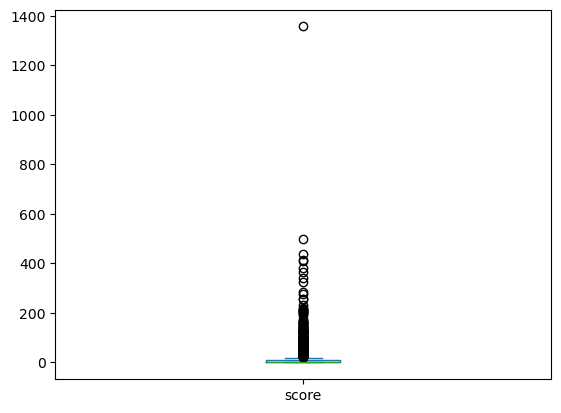

In [ ]:
my_df["score"].plot(kind="box")

### Visualisations avec Pandas

Vous pouvez utiliser pandas pour tracer vos résultats en utilisant la méthode `.plot()` sur un objet DataFrame ou Series.

Pour plus d'informations, cliquez [**ici**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

#### Aller plus loin

Il existe de nombreuses options pour jouer avec et améliorer une figure. 
Lorsque vous cherchez de l'aide pour changer quelque chose sur une figure, si vous avez la bonne terminologie, il est assez facile de trouver de l'aide !

#### Anatomie d'une figure
![Anatomie d'une figure](https://matplotlib.org/3.1.1/_images/anatomy.png)